In [1]:
import numpy as np
x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Edge-IIoT/attackmodel.csv", mode='a', index=False)

In [3]:
import joblib
import tensorflow as tf
from art.estimators.classification import TensorFlowV2Classifier

model = joblib.load("/home/jovyan/Edge-IIoT/pre_train/XGB.joblib")

# Wrap the model
classifier = TensorFlowV2Classifier(model=model, nb_classes=4,
    input_shape=(52,),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(),)

2024-04-09 20:37:46.775119: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 20:37:46.778917: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 20:37:46.813291: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 20:37:47.607342: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epsilon = 0.01
FPR: [0.         0.         0.02468582 0.95779817]
TPR: [0.14035088 0.18309859 0.         1.        ]
FNR: [0.85964912 0.81690141 1.         0.        ]
TNR: [1.         1.         0.97531418 0.04220183]
Accuracy: 0.485597695631301
Precision(micro,macro,weighted): 0.485597695631301,0.6218703976435935,0.29047970208370305
F1(micro,macro,weighted: 0.485597695631301,0.30278080005802777,0.3278404583902176
Recall(micro,macro,weighted: 0.485597695631301,0.33086236718556955,0.485597695631301
FPR: 0.2456209955034342
tpr: 0.33086236718556955
fnr: 0.6691376328144305
tnr: 0.7543790044965658


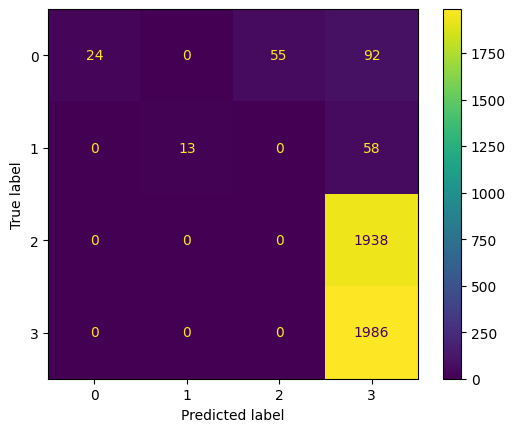

epsilon = 0.1
FPR: [0.         0.         0.02468582 0.95779817]
TPR: [0.14035088 0.18309859 0.         1.        ]
FNR: [0.85964912 0.81690141 1.         0.        ]
TNR: [1.         1.         0.97531418 0.04220183]
Accuracy: 0.485597695631301
Precision(micro,macro,weighted): 0.485597695631301,0.6218703976435935,0.29047970208370305
F1(micro,macro,weighted: 0.485597695631301,0.30278080005802777,0.3278404583902176
Recall(micro,macro,weighted: 0.485597695631301,0.33086236718556955,0.485597695631301
FPR: 0.2456209955034342
tpr: 0.33086236718556955
fnr: 0.6691376328144305
tnr: 0.7543790044965658


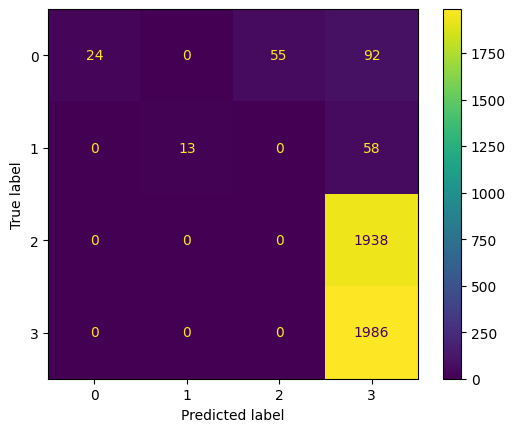

epsilon = 0.2
FPR: [0.00000000e+00 7.32600733e-04 2.51346499e-02 9.57798165e-01]
TPR: [0.11695906 0.18309859 0.         1.        ]
FNR: [0.88304094 0.81690141 1.         0.        ]
TNR: [1.         0.9992674  0.97486535 0.04220183]
Accuracy: 0.4846375420067211
Precision(micro,macro,weighted): 0.4846375420067211,0.5749953976435935,0.28728419080189793
F1(micro,macro,weighted: 0.4846375420067211,0.29093005075918316,0.3261509266957161
Recall(micro,macro,weighted: 0.4846375420067211,0.3250144139691953,0.4846375420067211
FPR: 0.24591635394511221
tpr: 0.3250144139691953
fnr: 0.6749855860308047
tnr: 0.7540836460548878


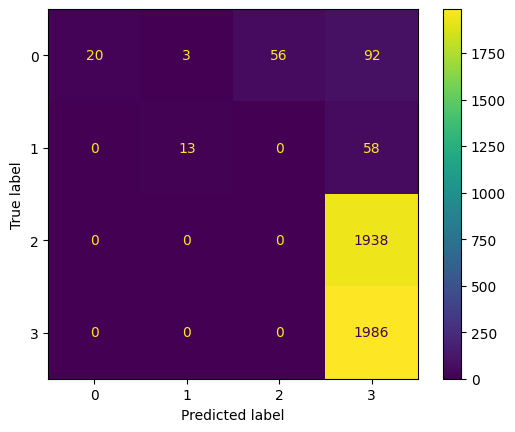

epsilon = 0.3
FPR: [0.         0.         0.02872531 0.95779817]
TPR: [0.0877193  0.18309859 0.         1.        ]
FNR: [0.9122807  0.81690141 1.         0.        ]
TNR: [1.         1.         0.97127469 0.04220183]
Accuracy: 0.48343734997599613
Precision(micro,macro,weighted): 0.48343734997599613,0.6218703976435935,0.29047970208370305
F1(micro,macro,weighted: 0.4834373499759962,0.2815649191647275,0.3243571020457583
Recall(micro,macro,weighted: 0.48343734997599613,0.31770447244872746,0.48343734997599613
FPR: 0.24663086983018465
tpr: 0.31770447244872746
fnr: 0.6822955275512725
tnr: 0.7533691301698154


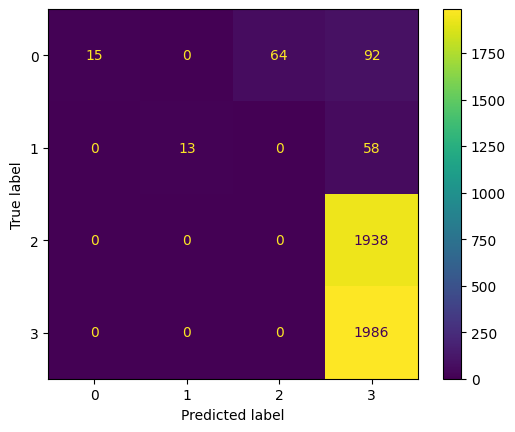

In [4]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGBoost", "FGSM", epsilon)

epsilon = 0.01
FPR: [0.00000000e+00 2.44200244e-04 1.88509874e-02 9.49082569e-01]
TPR: [0.21637427 0.43661972 0.         1.        ]
FNR: [0.78362573 0.56338028 1.         0.        ]
TNR: [1.         0.9997558  0.98114901 0.05091743]
Accuracy: 0.4930388862217955
Precision(micro,macro,weighted): 0.4930388862217955,0.6146289303329223,0.29103599917540446
F1(micro,macro,weighted: 0.4930388862217954,0.40380450340027735,0.33830613887751027
Recall(micro,macro,weighted: 0.4930388862217955,0.4132484968289268,0.4930388862217955
FPR: 0.24204443912105367
tpr: 0.4132484968289268
fnr: 0.5867515031710733
tnr: 0.7579555608789463


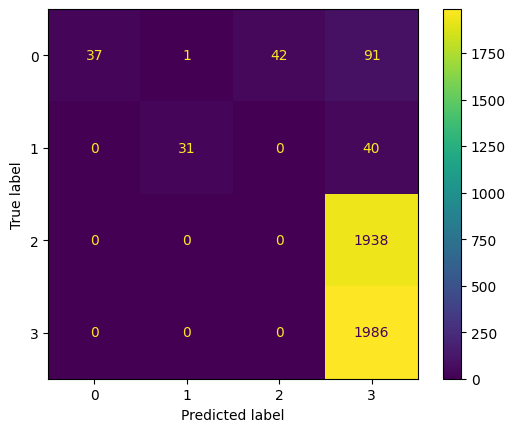

epsilon = 0.1
FPR: [0.02578223 0.         0.02289048 0.90458716]
TPR: [0.19298246 0.29577465 0.         1.        ]
FNR: [0.80701754 0.70422535 1.         0.        ]
TNR: [0.97421777 1.         0.97710952 0.09541284]
Accuracy: 0.4896783485357657
Precision(micro,macro,weighted): 0.4896783485357657,0.4361039072020926,0.2662037990995481
F1(micro,macro,weighted: 0.4896783485357657,0.3349355825022592,0.33516411359187487
Recall(micro,macro,weighted: 0.4896783485357657,0.3721892760069187,0.4896783485357657
FPR: 0.23831496712192762
tpr: 0.3721892760069187
fnr: 0.6278107239930812
tnr: 0.7616850328780724


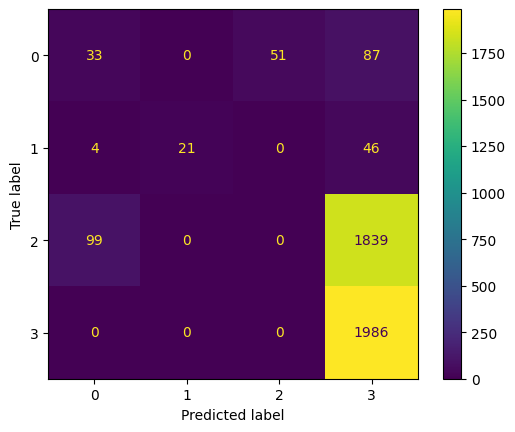

epsilon = 0.2
FPR: [0.02403004 0.         0.01301616 0.9233945 ]
TPR: [0.12280702 0.29577465 0.         1.        ]
FNR: [0.87719298 0.70422535 1.         0.        ]
TNR: [0.97596996 1.         0.98698384 0.0766055 ]
Accuracy: 0.4867978876620259
Precision(micro,macro,weighted): 0.4867978876620259,0.4190278338815473,0.26115887700090756
F1(micro,macro,weighted: 0.4867978876620259,0.3165035550833606,0.33014344962732445
Recall(micro,macro,weighted: 0.4867978876620259,0.3546454163577959,0.4867978876620259
FPR: 0.24011017273725144
tpr: 0.3546454163577959
fnr: 0.6453545836422041
tnr: 0.7598898272627486


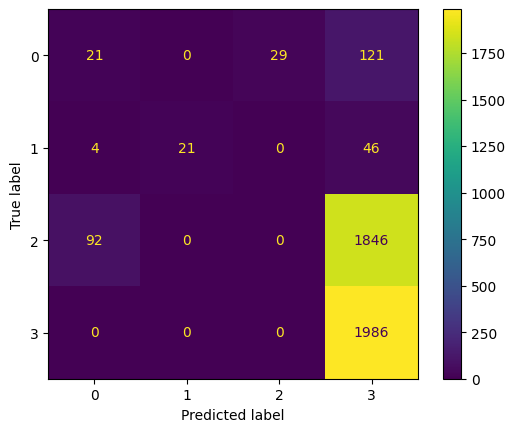

epsilon = 0.3
FPR: [0.05281602 0.         0.02423698 0.86788991]
TPR: [5.84795322e-03 2.95774648e-01 5.15995872e-04 1.00000000e+00]
FNR: [0.99415205 0.70422535 0.999484   0.        ]
TNR: [0.94718398 1.         0.97576302 0.13211009]
Accuracy: 0.4822371579452712
Precision(micro,macro,weighted): 0.4822371579452712,0.38375461215441464,0.2698301946536787
F1(micro,macro,weighted: 0.4822371579452712,0.28502513149167985,0.331366908006852
Recall(micro,macro,weighted: 0.4822371579452712,0.3255346492439328,0.4822371579452712
FPR: 0.2362357280309807
tpr: 0.3255346492439328
fnr: 0.6744653507560672
tnr: 0.7637642719690193


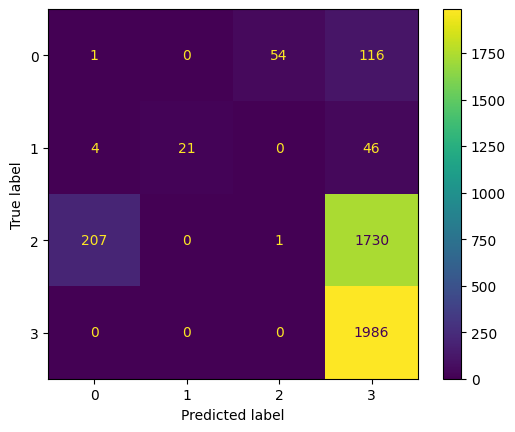

In [5]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGBoost", "BIM", epsilon)

epsilon = 0.01
FPR: [0.30963705 0.01758242 0.32854578 0.97477064]
TPR: [0. 0. 0. 0.]
FNR: [1. 1. 1. 1.]
TNR: [0.69036295 0.98241758 0.67145422 0.02522936]
Accuracy: 0.0
Precision(micro,macro,weighted): 0.0,0.0,0.0
F1(micro,macro,weighted: 0.0,0.0,0.0
Recall(micro,macro,weighted: 0.0,0.0,0.0
FPR: 0.40763397176540417
tpr: 0.0
fnr: 1.0
tnr: 0.5923660282345958


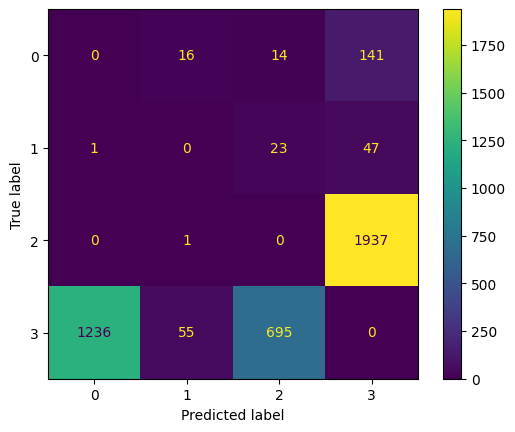

epsilon = 0.1
FPR: [0.31088861 0.01733822 0.32675045 0.97477064]
TPR: [0. 0. 0. 0.]
FNR: [1. 1. 1. 1.]
TNR: [0.68911139 0.98266178 0.67324955 0.02522936]
Accuracy: 0.0
Precision(micro,macro,weighted): 0.0,0.0,0.0
F1(micro,macro,weighted: 0.0,0.0,0.0
Recall(micro,macro,weighted: 0.0,0.0,0.0
FPR: 0.4074369797841352
tpr: 0.0
fnr: 1.0
tnr: 0.5925630202158649


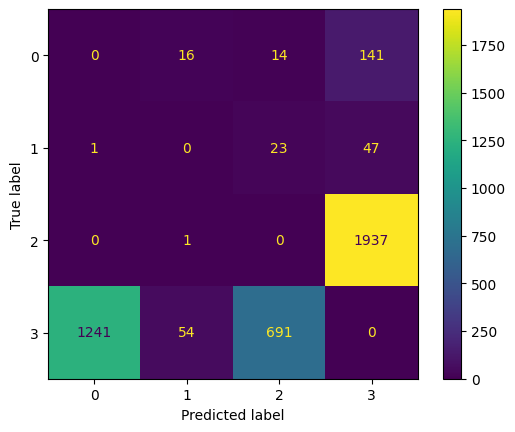

epsilon = 0.2
FPR: [0.30988736 0.01831502 0.32675045 0.97477064]
TPR: [0. 0. 0. 0.]
FNR: [1. 1. 1. 1.]
TNR: [0.69011264 0.98168498 0.67324955 0.02522936]
Accuracy: 0.0
Precision(micro,macro,weighted): 0.0,0.0,0.0
F1(micro,macro,weighted: 0.0,0.0,0.0
Recall(micro,macro,weighted: 0.0,0.0,0.0
FPR: 0.40743086713722154
tpr: 0.0
fnr: 1.0
tnr: 0.5925691328627786


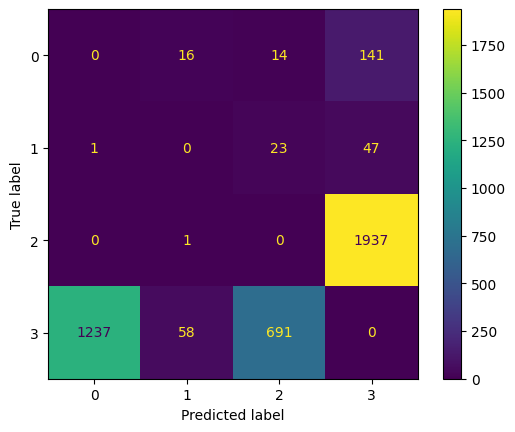

epsilon = 0.3
FPR: [0.30788486 0.01953602 0.32809695 0.97477064]
TPR: [0. 0. 0. 0.]
FNR: [1. 1. 1. 1.]
TNR: [0.69211514 0.98046398 0.67190305 0.02522936]
Accuracy: 0.0
Precision(micro,macro,weighted): 0.0,0.0,0.0
F1(micro,macro,weighted: 0.0,0.0,0.0
Recall(micro,macro,weighted: 0.0,0.0,0.0
FPR: 0.40757211643582747
tpr: 0.0
fnr: 1.0
tnr: 0.5924278835641725


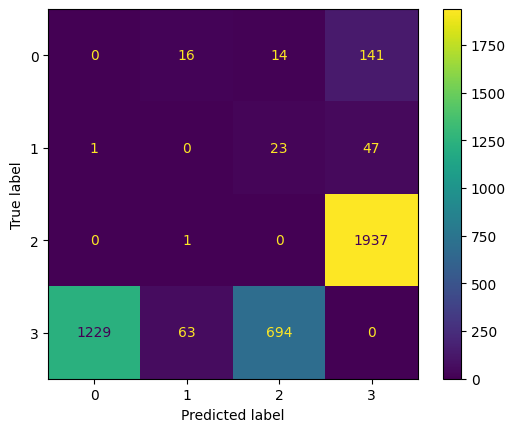

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGBoost", "DF", epsilon)

epsilon = 0.01
FPR: [0.         0.         0.02423698 0.94862385]
TPR: [0.1754386 0.3943662 0.        1.       ]
FNR: [0.8245614 0.6056338 1.        0.       ]
TNR: [1.         1.         0.97576302 0.05137615]
Accuracy: 0.49063850216034566
Precision(micro,macro,weighted): 0.49063850216034566,0.6224716329551061,0.29162617671516144
F1(micro,macro,weighted: 0.49063850216034566,0.38044498059571696,0.33538923616032956
Recall(micro,macro,weighted: 0.49063850216034566,0.39245119841858167,0.49063850216034566
FPR: 0.243215209263255
tpr: 0.39245119841858167
fnr: 0.6075488015814183
tnr: 0.7567847907367451


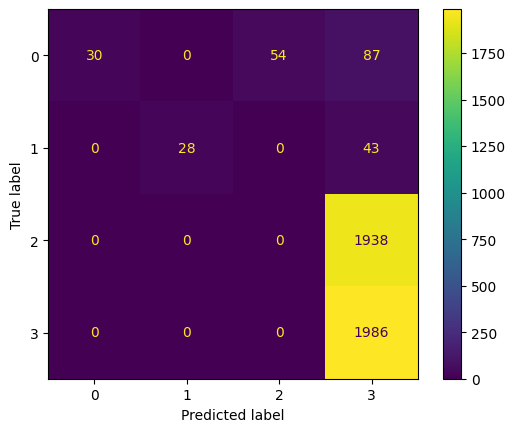

epsilon = 0.1
FPR: [0.00425532 0.         0.02468582 0.93577982]
TPR: [0.23391813 0.3943662  0.         1.        ]
FNR: [0.76608187 0.6056338  1.         0.        ]
TNR: [0.99574468 1.         0.97531418 0.06422018]
Accuracy: 0.4930388862217955
Precision(micro,macro,weighted): 0.4930388862217955,0.5487619944047899,0.2810084188731002
F1(micro,macro,weighted: 0.4930388862217954,0.39430310033839816,0.33899889596561544
Recall(micro,macro,weighted: 0.4930388862217955,0.4070710814595173,0.4930388862217955
FPR: 0.24118023813470493
tpr: 0.4070710814595173
fnr: 0.5929289185404827
tnr: 0.758819761865295


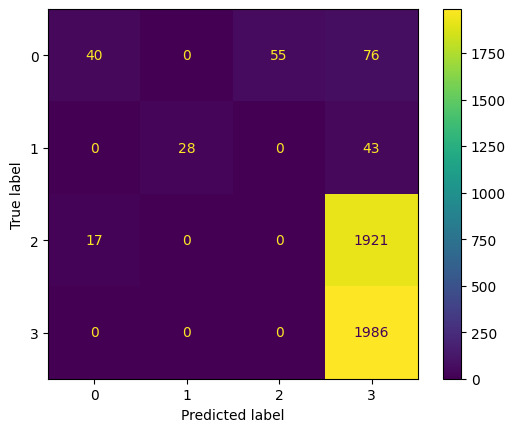

epsilon = 0.2
FPR: [0.00350438 0.         0.02648115 0.93440367]
TPR: [0.24561404 0.3943662  0.         1.        ]
FNR: [0.75438596 0.6056338  1.         0.        ]
TNR: [0.99649562 1.         0.97351885 0.06559633]
Accuracy: 0.49351896303408543
Precision(micro,macro,weighted): 0.49351896303408543,0.5609153616703952,0.28316409820202104
F1(micro,macro,weighted: 0.49351896303408543,0.3991772764472745,0.33994287203977175
Recall(micro,macro,weighted: 0.49351896303408543,0.4099950580677045,0.49351896303408543
FPR: 0.2410972998032331
tpr: 0.4099950580677045
fnr: 0.5900049419322955
tnr: 0.7589027001967669


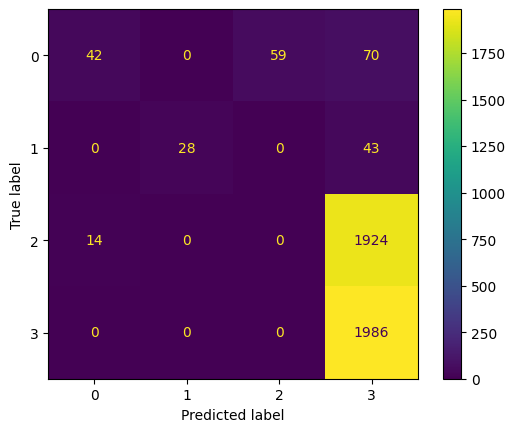

epsilon = 0.3
FPR: [0.00125156 0.         0.04443447 0.93623853]
TPR: [0.03508772 0.4084507  0.         1.        ]
FNR: [0.96491228 0.5915493  1.         0.        ]
TNR: [0.99874844 1.         0.95556553 0.06376147]
Accuracy: 0.48511761881901105
Precision(micro,macro,weighted): 0.48511761881901105,0.5096564101406416,0.2745344508298744
F1(micro,macro,weighted: 0.48511761881901105,0.32662570840102856,0.3274950306930967
Recall(micro,macro,weighted: 0.48511761881901105,0.36088460588089943,0.48511761881901105
FPR: 0.24548114173567026
tpr: 0.36088460588089943
fnr: 0.6391153941191006
tnr: 0.7545188582643297


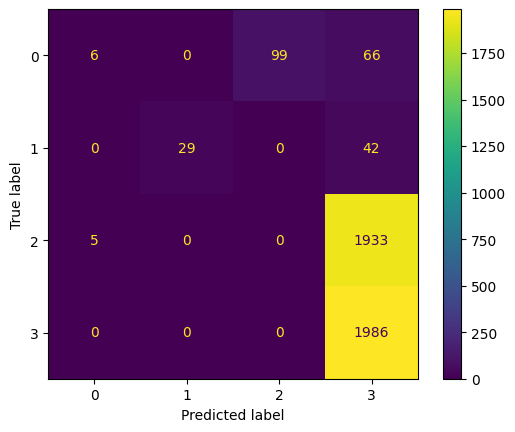

In [7]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGBoost", "PDG", epsilon)